# Analyse d'une base de données des emplyés

## Présentation de la base de données

__L'ensemble de données comprend 4 variables sur 74 employés. Les valeurs sont qualitatives et sont les suivantes:__

- Work_accident: 0 pas d'accident pendant le séjour du salarié, 1 - accident lors du séjour du salarié 
- left: 0 indique que l'employé reste dans l'entreprise, 1 indique - l'employé a quitté l'entreprise 
- sales: indique le département de l'employé (IT, support, marketing, product_mng, sales, hr, management, technical, accounting, RandD)
- salary: indique la catégorie du salaire (low, medium, high)

In [6]:
import pandas as pd
import numpy as np
from fanalysis.mca import MCA
import matplotlib.pyplot as plt

## Enoncé

__1. Extraire les statistiques sur le jeux de données__

__2. Analyse ACM:__
   - Effectuer une ACM sur le jeu de données. Justifier le nombre de composantes retournées par l'ACM.
   - Afficher les valeurs propres et les ratio de variance expliquée par chaque composante. 
   - Quelle est le nombre de facteurs à garder? justifier le choix.
   - Effectuer l'ACM avec le nombre de facteurs gardés. 
   - Afficher les coordonnées, les contributions et les qualités de représentation des points lignes sur chaque axe. 
   - Tracer le graphique des points lignes sur les deux premières composantes et interpréter le résultats.
   - Afficher les coordonnées, les contributions et les qualités de représentation des points colonnes sur chaque axe.
   - Tracer le graphique des points colonnes sur les deux premières composantes et interprétez le résultats.
   - Est-il intéressant de tracer les graphiques (points lignes et points colonnes) sur les autres dimensions ? Effectuer la démarche le cas échéant, et analyser.

In [7]:
data = pd.read_excel('ACM_data.xls')
data.index = [f'{i+1}' for i in range(len(data.index))]

In [8]:
data

Work accident  Left        sales  salary
1      Work Accident  Stay    technical     low
2   No Work Accident  Stay  product_mng  medium
3   No Work Accident  Stay    technical  medium
4      Work Accident  Left    technical     low
5      Work Accident  Stay   management     low
..               ...   ...          ...     ...
70     Work Accident  Stay    technical  medium
71     Work Accident  Stay        sales     low
72     Work Accident  Stay           IT    high
73     Work Accident  Stay        sales     low
74     Work Accident  Stay  product_mng     low

[74 rows x 4 columns]

In [9]:
X = data.values

In [32]:
my_mca = MCA(row_labels=data.index.values, var_labels=data.columns.values)

In [33]:
my_mca.fit(X)

MCA(row_labels=array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74'], dtype=object),
    var_labels=array(['Work accident', ' Left', 'sales', 'salary'], dtype=object))

In [34]:
print(my_mca.eig_)

[[  0.41867368   0.39901338   0.301029     0.27856484   0.25
    0.25         0.25         0.25         0.25         0.20998899
    0.14898324   0.13799968   0.10574719]
 [ 12.88226714  12.27733473   9.26243076   8.57122597   7.69230769
    7.69230769   7.69230769   7.69230769   7.69230769   6.4611996
    4.58409959   4.24614404   3.2537597 ]
 [ 12.88226714  25.15960187  34.42203263  42.99325861  50.6855663
   58.37787399  66.07018168  73.76248937  81.45479707  87.91599667
   92.50009625  96.7462403  100.        ]]


In [35]:
# L'ACM retourne 13 composantes, cela est suffisant pour etsimer le jeu de données que l'on nous propose

In [36]:
# On peut garder les facteurs dont les valeurs propres sont supérieures à la moyenne des valeurs propres

In [37]:
print("La moyenne des valeurs propres : \n", np.average(my_mca.eig_[0]))

La moyenne des valeurs propres : 
 0.25


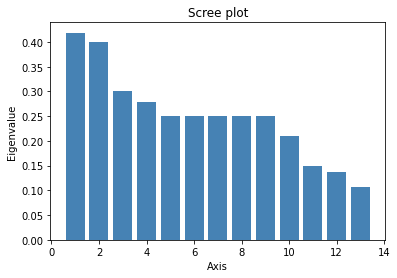

In [38]:
my_mca.plot_eigenvalues()

In [23]:
# On garde donc les 4 premiers facteurs

In [39]:
#Instanciation
my_mca = MCA(row_labels=data.index.values, var_labels=data.columns.values[0:6],n_components=4)
#Calcul
my_mca.fit(X)

MCA(n_components=4,
    row_labels=array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74'], dtype=object),
    var_labels=array(['Work accident', ' Left', 'sales', 'salary'], dtype=object))

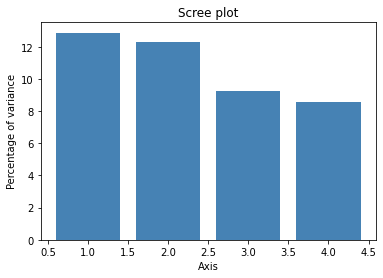

In [40]:
my_mca.plot_eigenvalues(type="percentage")

In [41]:
# ACM avec les 4 composantes gardées

In [52]:
# Points lignes
data_rows = my_mca.row_topandas()
print(data_rows)

    row_coord_dim1  row_coord_dim2  row_coord_dim3  row_coord_dim4  \
1        -0.302886        0.039675        0.003860       -0.291732   
2         0.540536       -1.243149        0.757534       -0.744000   
3         0.417859       -0.950990        0.491827       -0.873193   
4        -1.012030        0.277302        0.016665       -0.650415   
5         0.514458        0.968120        0.070470        0.022530   
..             ...             ...             ...             ...   
70        0.142997       -0.301729       -0.273546       -0.643722   
71       -0.125739        0.014809        0.373874        0.649383   
72        0.722142        0.832384        0.111487        0.102018   
73       -0.125739        0.014809        0.373874        0.649383   
74       -0.180209       -0.252484        0.269567       -0.162538   

    row_contrib_dim1  row_contrib_dim2  row_contrib_dim3  row_contrib_dim4  \
1           0.296108          0.005331          0.000067          0.412867   
2  

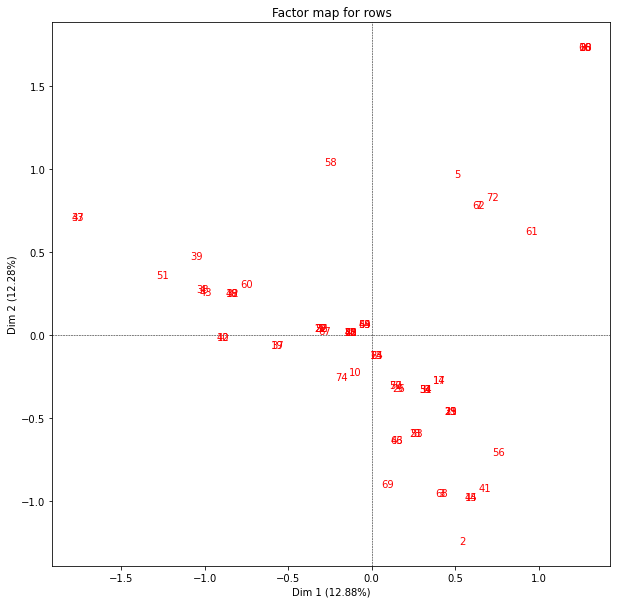

In [53]:
# Mapping des points lignes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_mca.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(10,10))

In [54]:
print("Inteprétation :\nOn peut voir sur ce graphique que les individus se distinguent très bien les uns des autres. Les quelques individus situés au centre du graphique représentent la moyenne de tous, et au contraire ceux situés aux étrémités sont plutôt exrêmes et ne ressemblent peu aux autres. Plus les individus sont proches les uns des autres, plus ils se ressemblent, et au contraire plus ils sont éloignés plus ils se différencient.")

Inteprétation :
On peut voir sur ce graphique que les individus se distinguent très bien les uns des autres. Les quelques individus situés au centre du graphique représentent la moyenne de tous, et au contraire ceux situés aux étrémités sont plutôt exrêmes et ne ressemblent peu aux autres. Plus les individus sont proches les uns des autres, plus ils se ressemblent, et au contraire plus ils sont éloignés plus ils se différencient.


In [55]:
# Points colonnes
df_cols = my_mca.col_topandas()
print(df_cols)

                                col_coord_dim1  col_coord_dim2  \
Work accident_No Work Accident        0.624875       -1.440970   
Work accident_Work Accident          -0.086521        0.199519   
 Left_Left                           -1.463364        0.478707   
 Left_Stay                            0.372042       -0.121705   
sales_IT                              0.258612       -0.027812   
sales_RandD                          -1.045438        0.107036   
sales_accounting                      1.169964       -1.120233   
sales_hr                             -2.354057        0.998534   
sales_management                      1.696186        2.251245   
sales_marketing                      -0.365350       -0.144793   
sales_product_mng                    -0.101751       -0.832856   
sales_sales                           0.039228       -0.157487   
sales_support                         0.436913       -0.499994   
sales_technical                      -0.419263       -0.094659   
salary_hig

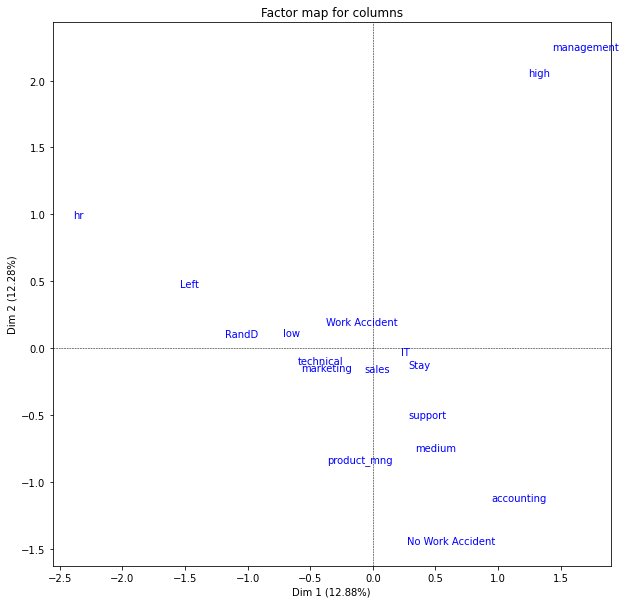

In [56]:
# Mapping des points colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_mca.mapping_col(num_x_axis=1, num_y_axis=2,figsize=(10,10))

In [58]:
print("Interprétation :\nOn peut voir que les variables suivent approximativement une ligne, qui va de hr jusqu'à No Work Accident et accounting, sauf management et high qui sont isolés tout en haut à droite du graphique. Ces 2 dernières variables, fortement corrélées, s'opposent notamment à No Work Accident suivant l'axe 2, tandis que hr et accounting sont opposés surtout du point de vue de l'axe 1. Les variables low, Work Accident, technical, marketing, sales, IT et Stay sont toutes très corrélées et se trouvent au milieu du graphique, ce qui signifie qu'elles représentent le comportement moyen des individus.")

Interprétation :
On peut voir que les variables suivent approximativement une ligne, qui va de hr jusqu'à No Work Accident et accounting, sauf management et high qui sont isolés tout en haut à droite du graphique. Ces 2 dernières variables, fortement corrélées, s'opposent notamment à No Work Accident suivant l'axe 2, tandis que hr et accounting sont opposés surtout du point de vue de l'axe 1. Les variables low, Work Accident, technical, marketing, sales, IT et Stay sont toutes très corrélées et se trouvent au milieu du graphique, ce qui signifie qu'elles représentent le comportement moyen des individus.


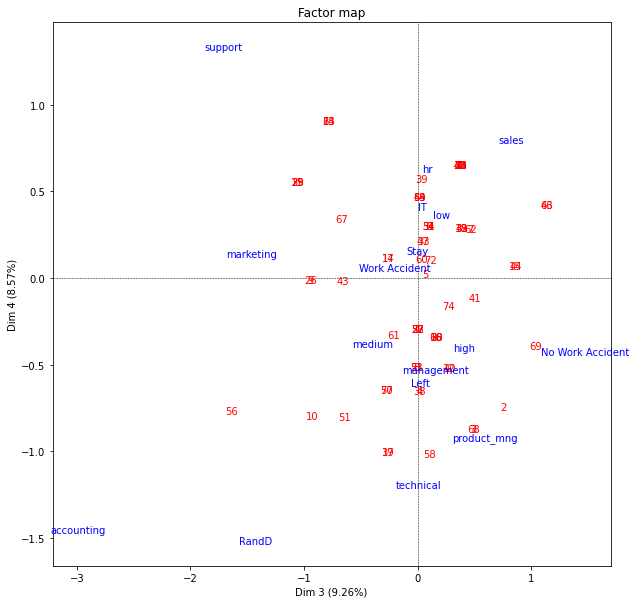

In [59]:
# Mapping simultané des points lignes et colonnes sur les axes 3 et 4
my_mca.mapping(num_x_axis=3, num_y_axis=4,figsize=(10,10))

In [62]:
print("On voit qu'il est beaucoup moins pertinent de tracerr le graphique sur les axes 3 et 4 car ceux-ci contribuent moins à la variance totale du jeu de données et représentent donc moins bien les variables et les individus? Cela se voit surtout pour les individus qui se distinguent beaucoup moins les uns des autres et sont plus regroupés au centre (même si les échelles sont différentes).")

On voit qu'il est beaucoup moins pertinent de tracerr le graphique sur les axes 3 et 4 car ceux-ci contribuent moins à la variance totale du jeu de données et représentent donc moins bien les variables et les individus? Cela se voit surtout pour les individus qui se distinguent beaucoup moins les uns des autres et sont plus regroupés au centre (même si les échelles sont différentes).
